In [1]:
import pandas as pd
import numpy as np
import h5py
import os
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F

from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch import nn, optim
from collections import OrderedDict

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
ancho = 160
alto = 129
canales = 3
pixeles = ancho*alto*canales
cantidadClases = 5
clases = ['Banano', 'Granada', 'Kiwi', 'Mango', 'Pitaya']
batchSize = 64

In [3]:
def view_classify(img, ps):
  ps = ps.data.numpy().squeeze()
  fig, (ax1, ax2) = plt.subplots(figsize=(16,13), ncols=2)
  ax1.imshow(img.numpy().transpose((1, 2, 0)))
  ax1.axis('off')
  ax2.barh(np.arange(cantidadClases), ps)
  ax2.set_aspect(0.1)
  ax2.set_yticks(np.arange(cantidadClases))
  ax2.set_yticklabels(clases, size='medium');
  ax2.set_title('Probabilidad de las Clases')
  ax2.set_xlim(0, 1.1)

  plt.tight_layout()

In [4]:
transform = transforms.Compose([transforms.Resize((ancho, alto)),transforms.ToTensor(),])
current_dir = os.getcwd()
dataset_path = os.path.join(current_dir, 'dataset', 'Frutas', 'Train')
trainset = ImageFolder(root=dataset_path, transform=transform)
trainloader = DataLoader(trainset, batch_size=batchSize, shuffle=True)

testset_path = os.path.join(current_dir, 'dataset', 'Frutas', 'Test')
testset = ImageFolder(root=testset_path, transform=transform)
testloader = DataLoader(testset, batch_size=batchSize, shuffle=True)

In [5]:
class Network(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(pixeles, 20640)
    self.fc2 = nn.Linear(20640, 6880)
    self.fc3 = nn.Linear(6880, 2293)
    self.fc4 = nn.Linear(2293, 764)
    self.fc5 = nn.Linear(764, 254)
    self.fc6 = nn.Linear(254, 84)
    self.fc7 = nn.Linear(84, cantidadClases)
      
  def forward(self, x):
    
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = F.relu(self.fc4(x))
    x = F.relu(self.fc5(x))
    x = F.relu(self.fc6(x))
    x = F.log_softmax(self.fc7(x), dim=1)
    
    return x

In [6]:
model = Network()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)
image, label = next(iter(trainloader))

In [7]:
epochs = 100
for e in range(epochs):
  running_loss = 0
  for images, labels in trainloader:
    images = images.view(images.shape[0], -1)
    log_ps = model(images)
    loss = criterion(log_ps, labels)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    running_loss += loss.item()
  else:
    print(f"Epoch {e+1}, Training loss: {running_loss/len(trainloader)}")

Epoch 1, Training loss: 1.6100634336471558
Epoch 2, Training loss: 1.6098600130970195
Epoch 3, Training loss: 1.609773958133439
Epoch 4, Training loss: 1.6097459580938696
Epoch 5, Training loss: 1.6096254536661052
Epoch 6, Training loss: 1.6097279059684884
Epoch 7, Training loss: 1.6096208651187056
Epoch 8, Training loss: 1.6096486328011852
Epoch 9, Training loss: 1.609602208864891
Epoch 10, Training loss: 1.6095598744133772
Epoch 11, Training loss: 1.6095898040270402
Epoch 12, Training loss: 1.6094719909005246
Epoch 13, Training loss: 1.609426396378016
Epoch 14, Training loss: 1.6093544596332614
Epoch 15, Training loss: 1.6094016362044772
Epoch 16, Training loss: 1.609332062430301
Epoch 17, Training loss: 1.6093323291358301
Epoch 18, Training loss: 1.6093206526869435
Epoch 19, Training loss: 1.609259769067926
Epoch 20, Training loss: 1.6092771877676755
Epoch 21, Training loss: 1.6091968801061987
Epoch 22, Training loss: 1.6092593316304482
Epoch 23, Training loss: 1.6089904459856323
Ep

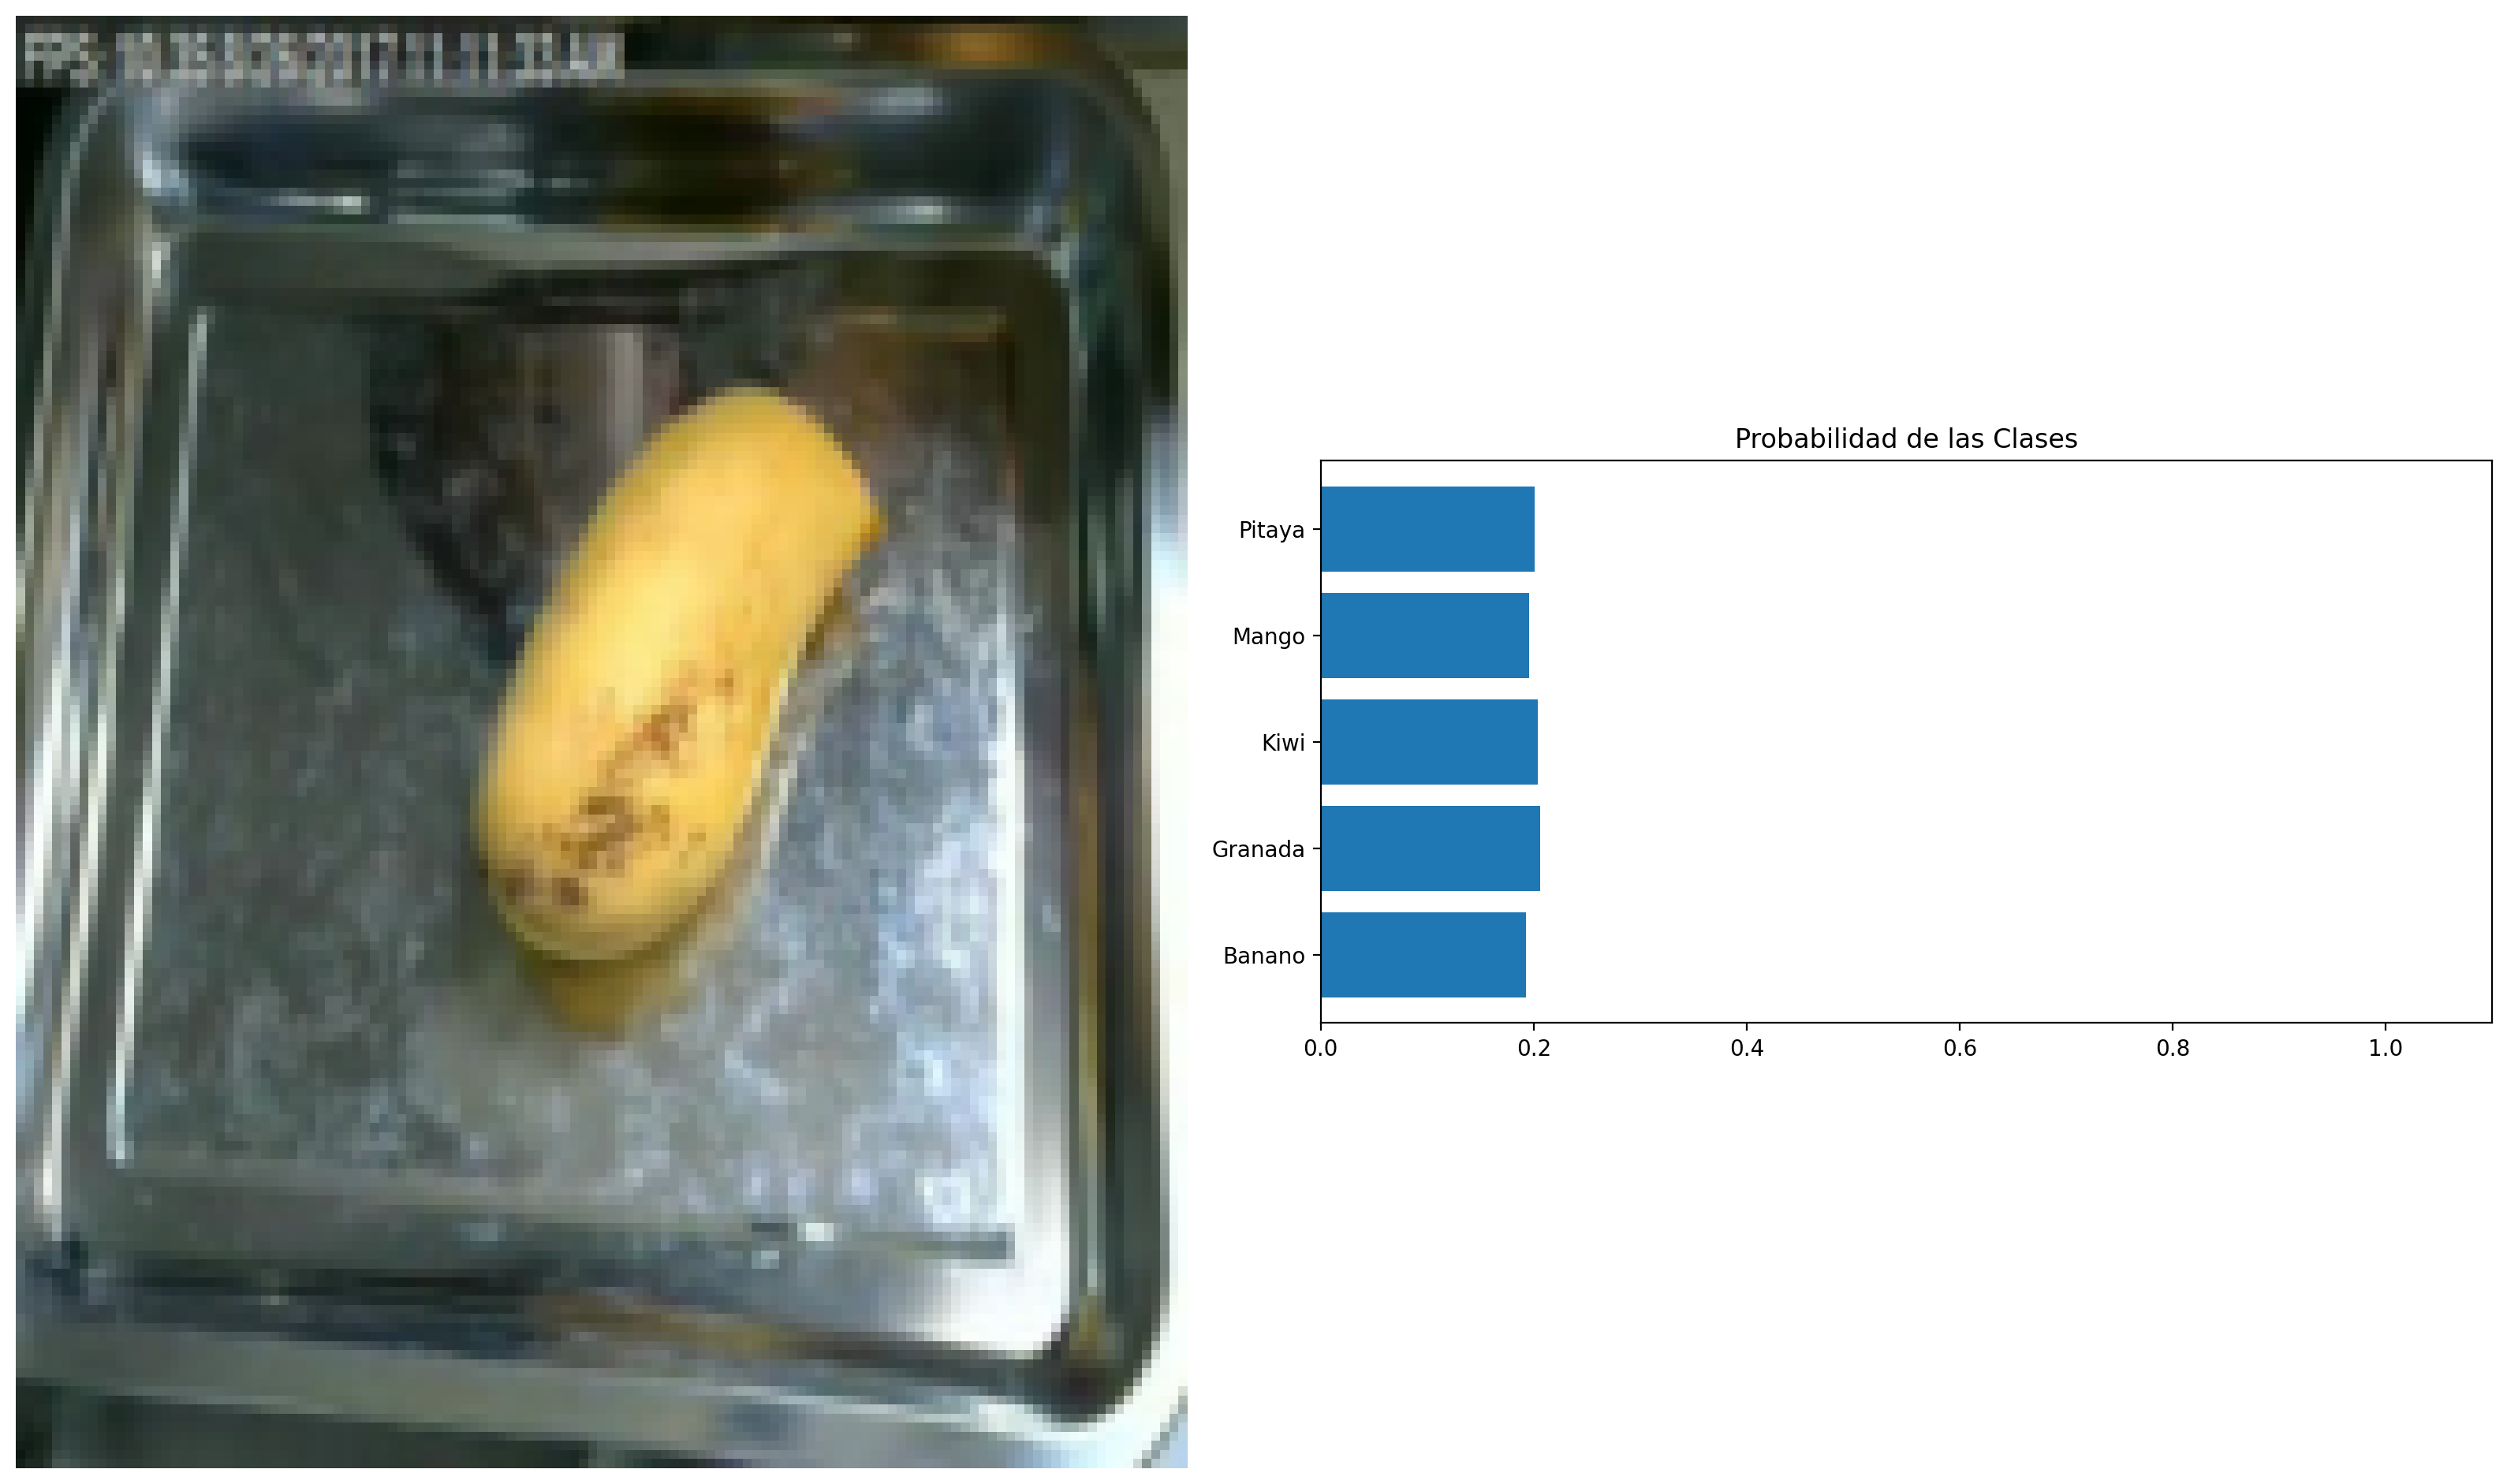

In [8]:
dataiter = iter(testloader)
images, labels = next(iter(testloader))
img = images[0].view(1, pixeles)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
view_classify(img.view(canales, ancho, alto), ps)

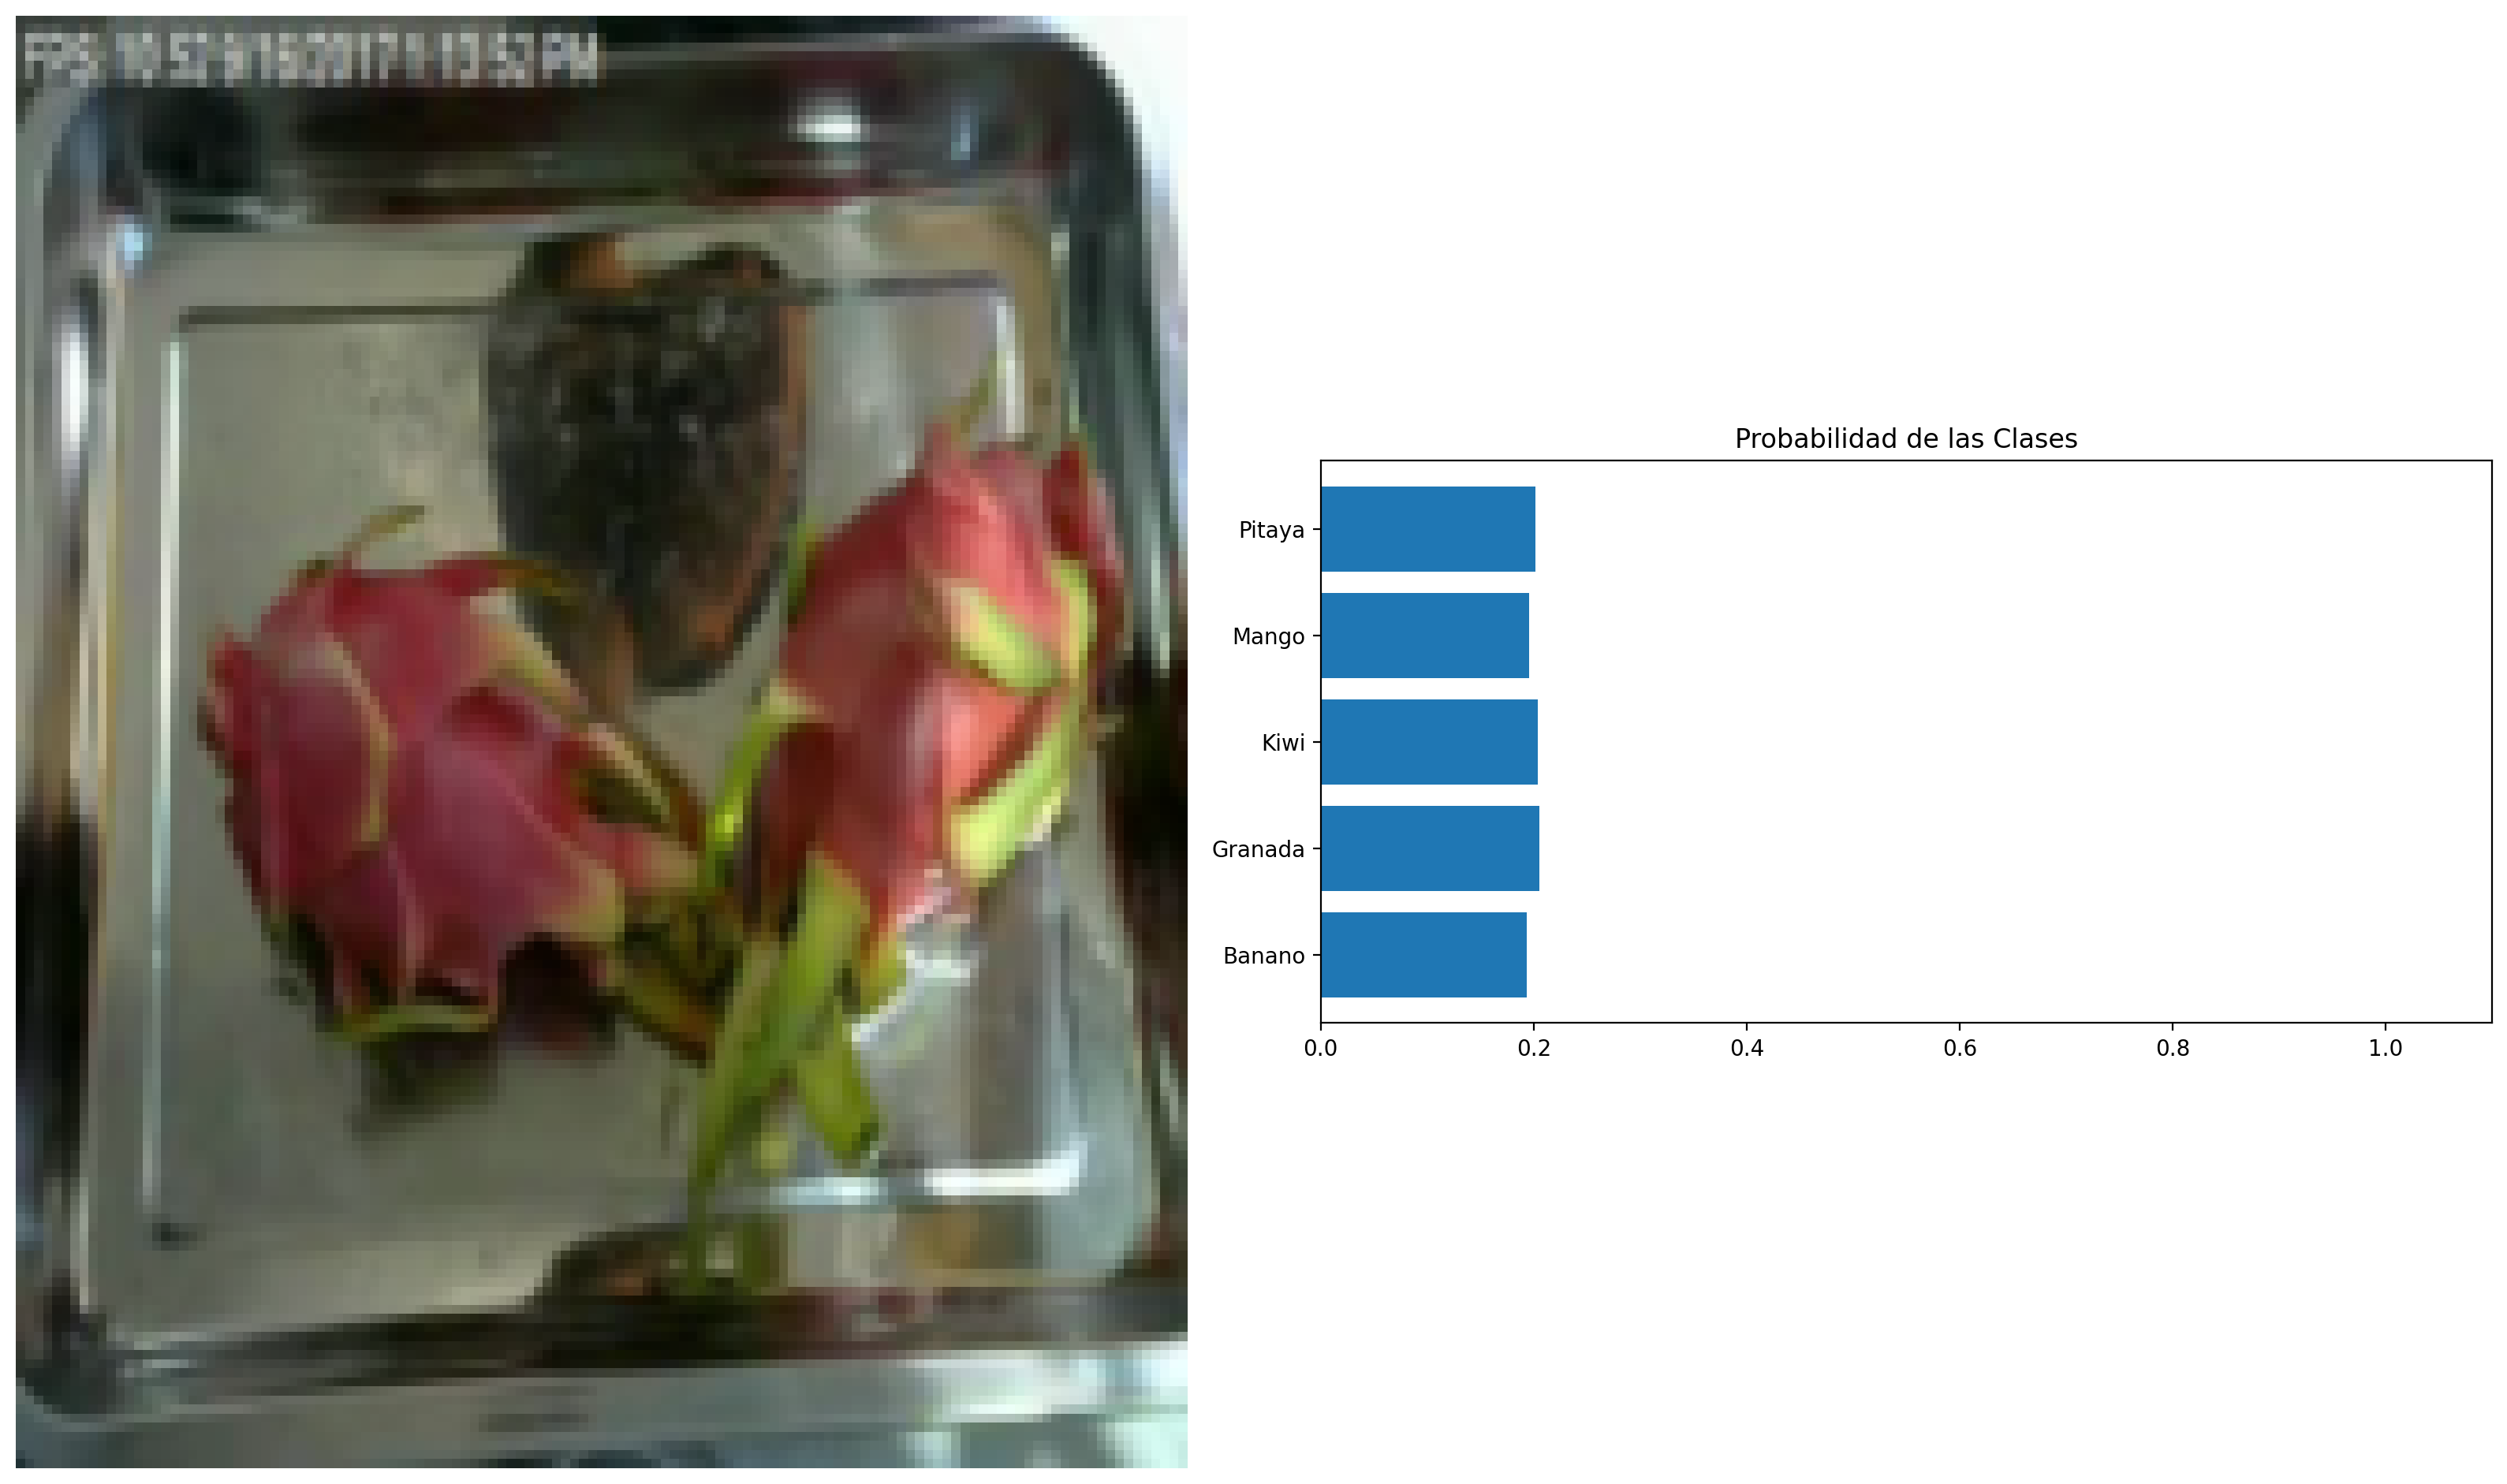

In [9]:
img = images[2].view(1, pixeles)

# TODO: Calculate the class probabilities (softmax) for img
ps = torch.exp(model(img))

# Plot the image and probabilities
view_classify(img.view(canales, ancho, alto), ps)

In [10]:
torch.save(model.state_dict(), 'modelo_entrenado.pth')
print("Modelo guardado exitosamente.")

Modelo guardado exitosamente.


In [ ]:
# Cargar el modelo
model = Network()  # Asegúrate de definir la arquitectura de la red antes de cargar
model.load_state_dict(torch.load('modelo_entrenado.pth'))
model.eval()  # Cambia el modelo al modo de evaluación
print("Modelo cargado exitosamente.")